# DATA ANALYSYS AND PREPROCESS

The dataset was first preprocessed, and then a few more aspects of the dataset were analysed.

In [1]:
!pip install pyLDAvis
# Because visualisation doesnt work on newer versions
!pip install pandas==1.5.3

  Using cached pandas-2.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.21.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.
  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.1
    Uninstalling pandas-2.2.1:
      Successfully uninstalled pandas-2.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of

In [2]:
import pandas as pd
import nltk
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt

from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [3]:
nltk.download('stopwords')
nltk.download('punkt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
DATASET_PATH = 'data/spam_ham_dataset.csv'

df = pd.read_csv(DATASET_PATH)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


# PREPROCESS

In [5]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text: str):
    """
    Preprocess the text by removing stopwords and stemming the words
    """
    tokens = word_tokenize(text.lower())
    tokens = [ps.stem(token) for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

df['processed_text'] = df['text'].apply(preprocess_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Example of text preprocessing

In [16]:
text = "Subject: spring savings certificate - " + \
       "take 30 % off save 30 % when you use our " +\
       "customer appreciation spring savings " + \
       "certificate at foot locker , lady foot " +\
       "locker , kids foot locker and at our online stores !"
print(" ".join(preprocess_text(text)))

subject spring save certif take save use custom appreci spring save certif foot locker ladi foot locker kid foot locker onlin store


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,label,text,label_num,processed_text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,"[subject, enron, methanol, meter, follow, note..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"[subject, hpl, nom, januari, see, attach, file..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"[subject, neon, retreat, ho, ho, ho, around, w..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,"[subject, photoshop, window, offic, cheap, mai..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,"[subject, indian, spring, deal, book, teco, pv..."


In [7]:
# Create a dictionary and a corpus
dictionary = Dictionary(df['processed_text'])
corpus = [dictionary.doc2bow(text) for text in df['processed_text']]

# Build LDA model
lda_model = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=10)

# Print the topics
print("Topics:")
for topic_id, words in lda_model.print_topics():
    print(f"Topic {topic_id + 1}: {words}")

# Get topic distribution for each document
for i, doc in enumerate(corpus):
    print(f"Document {i + 1} - Topic Distribution: {lda_model[doc]}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Streaming output truncated to the last 5000 lines.
Document 172 - Topic Distribution: [(0, 0.01127904), (1, 0.98872095)]
Document 173 - Topic Distribution: [(0, 0.9636765), (1, 0.03632346)]
Document 174 - Topic Distribution: [(0, 0.75722253), (1, 0.24277751)]
Document 175 - Topic Distribution: [(0, 0.97042316), (1, 0.029576844)]
Document 176 - Topic Distribution: [(0, 0.080088414), (1, 0.91991156)]
Document 177 - Topic Distribution: [(1, 0.99869955)]
Document 178 - Topic Distribution: [(0, 0.96998906), (1, 0.030010987)]
Document 179 - Topic Distribution: [(0, 0.9677671), (1, 0.032232862)]
Document 180 - Topic Distribution: [(1, 0.99717355)]
Document 181 - Topic Distribution: [(0, 0.18807225), (1, 0.81192774)]
Document 182 - Topic Distribution: [(0, 0.97014624), (1, 0.029853756)]
Document 183 - Topic Distribution: [(0, 0.7201389), (1, 0.2798611)]
Document 184 - Topic Distribution: [(0, 0.99699736)]
Document 185 - Topic Distribution: [(0, 0.027400155), (1, 0.9725998)]
Document 186 - Topi

In [8]:
# Create the visualization
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(lda_vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


# DATASET ANALYSYS

## Average word length for each class

In [22]:
def calculate_average_word_length(text: str) -> float:
    """Calculate the average word length of a text"""
    words = text.split()
    if len(words) == 0:
        return 0
    return sum(len(word) for word in words) / len(words)


# Group the dataframe by class and calculate the mean of word length
df["avg_word_len"] = df['text'].apply(calculate_average_word_length)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,label,text,label_num,processed_text,avg_word_len
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,"[subject, enron, methanol, meter, follow, note...",3.820896
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"[subject, hpl, nom, januari, see, attach, file...",3.173913
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"[subject, neon, retreat, ho, ho, ho, around, w...",3.574545
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,"[subject, photoshop, window, offic, cheap, mai...",7.416667
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,"[subject, indian, spring, deal, book, teco, pv...",3.757143


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


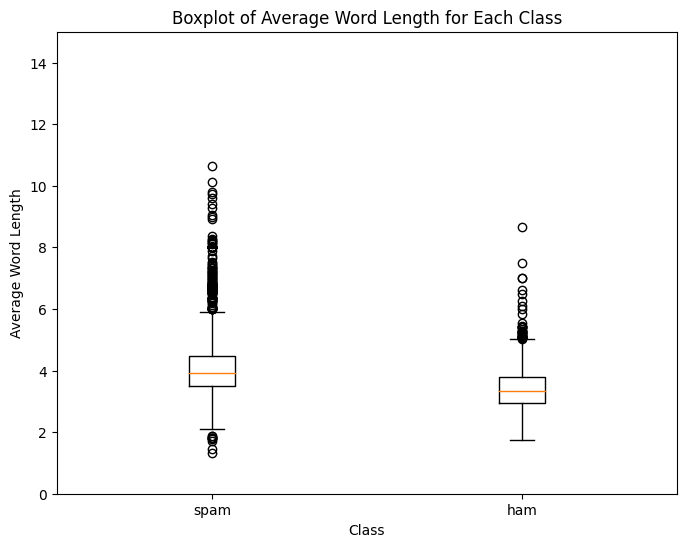

In [26]:
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['label'] == "spam"]['avg_word_len'], df[df['label'] == "ham"]['avg_word_len']])
plt.xticks([1, 2], ['spam', 'ham'])
plt.ylim(0, 15)
plt.xlabel('Class')
plt.ylabel('Average Word Length')
plt.title('Boxplot of Average Word Length for Each Class')
plt.show()

From the above comparasion we can see, that the average word length for spam emails is slightly bigger than the non-spam emails.